# Which Neighborbood is best for a stray cat?

Name: Matthew Bell

In [2]:
import pandas as pd
import geopandas
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import tree data
trees = pd.read_csv('Trees.csv', low_memory = False)

# Import neighborhood shape file
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# Before we beign...

We will be using the data set called **City of Pittsburgh Trees**

"Trees cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division"

Here is the idea: 

#### Cats LOVE climbing things!

![Cat Climbing](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExYnZqNGw0am5temR6bDJtenZvNTRtc3Y1Z3hzYTZ4ZWFtcDNuZGs2ZiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/IbHjdwQoVDq10lhHLf/giphy.gif)

So the first logical step would be:

more trees = more fun for cats

*Right?*

Well, let's see how many trees we're dealing with here.

In [3]:
# Get total number of trees
total_trees = len(trees)

# Address trees without neighborhood data
without_neighborhood = trees['neighborhood'].isna().sum()

# Find number of valid trees
valid_trees = total_trees - without_neighborhood
print(valid_trees)

45450


# That is a lot of trees...

However, some of them are *missing data* in the neighborhood column.

Which is obviously something we need...

Let's make this easier and create a **new data frame** with just trees that have neighborhood data.

And from that, create another with total trees by neighborhood!

In [4]:
# Create a new data frame containing trees with neighborhhod data
trees_with_neighborhood = trees[trees['neighborhood'].notna()].copy()

# Group by neighborhood and count the trees
tree_counts = trees_with_neighborhood.groupby('neighborhood').size().reset_index(name='tree_count')

# *Visualize*

Time to merge this data into a fancy map!

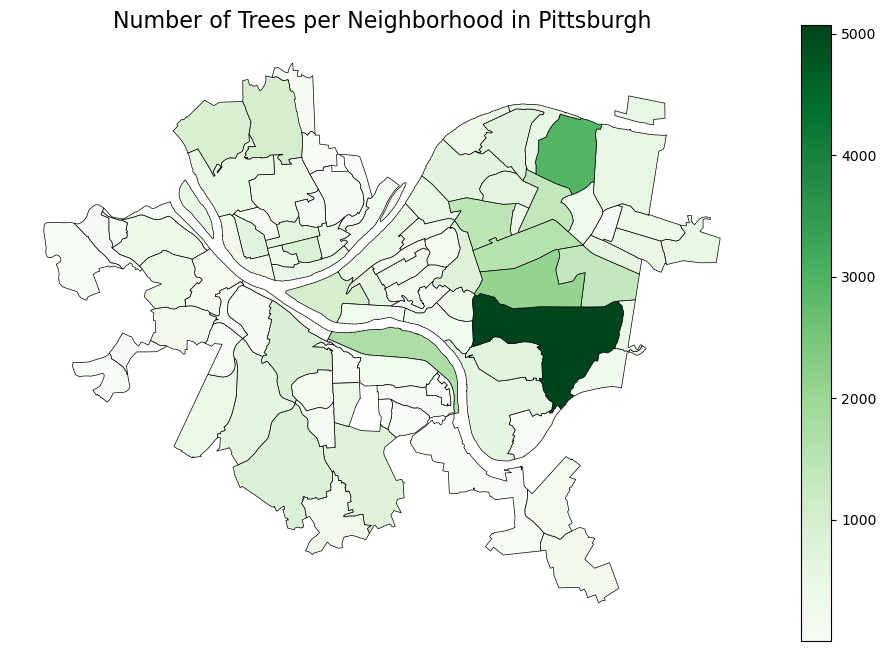

In [5]:
# Merge counts into shapefile
neighborhoods_map = neighborhoods.merge(tree_counts, left_on='hood', right_on='neighborhood', how='left')
neighborhoods_map['tree_count'] = neighborhoods_map['tree_count'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
neighborhoods_map.plot(
    column='tree_count',
    cmap='Greens',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

ax.set_title("Number of Trees per Neighborhood in Pittsburgh", fontsize=16)
ax.axis('off')
plt.show()

### The map looks nice...

*but*

Exactly how many trees are in each neighborhood?

We can easily show the top 5 using a table.

In [6]:
# Create a table showing the top 5 neighborhoods
top5_neighborhoods = tree_counts.sort_values(by='tree_count', ascending=False).head(5)
top5_neighborhoods

,neighborhood,tree_count
76,Squirrel Hill South,5073
39,Highland Park,2941
75,Squirrel Hill North,2083
71,South Side Flats,1693
67,Shadyside,1558


# There we have it!

*Wow!* That was **easy!**

According to our extremely rigorous analysis, the **winner** is:

### 🐈 Squirrel Hill South! 🐈

Most trees = best neighborhood

*Right?*



![Pump the brakes](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExdnN5amY0bWFjc3owOTB6ajhoOGd2d3Z0ZzBqb3N2eWZ4a29oa3VreiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3Om0aYfA5tJvQAxtTb/giphy.gif)


Not all trees are equal in the mind of a cat!

We have established that cats love climbing...

Therefore:

### *The neighborhood with the most **climbable area** should be #1!*

![Spongebob number one](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExcjBvbmo2YWxuaTkzcHZnazhibnljcTV6NGlzbTZibmtqM2U1c3F2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l3nFdFNwIXJ1RnoGY/giphy.gif)

To tackle this task, first use only the columns which we need for our purposes...

In [7]:
# Create a new data frame with only the information we need

# Define useful columns
useful_columns = [
    'common_name', 'height', 'diameter_base_height', 'neighborhood', 'latitude', 'longitude'
]

climbable_trees = trees[trees['neighborhood'].notna()][useful_columns].copy()
climbable_trees.head()

,common_name,height,diameter_base_height,neighborhood,latitude,longitude
0,Stump,0.0,16.0,Homewood North,40.458169,-79.889724
1,Linden: Littleleaf,0.0,22.0,Oakwood,40.429269,-80.067868
2,Maple: Red,22.0,6.0,South Side Flats,40.426797,-79.965035
3,Maple: Freeman,25.0,7.0,East Allegheny,40.455503,-79.999276
4,Maple: Norway,52.0,38.0,Highland Park,40.476667,-79.924106


![What](https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExdGsxbTg0NHZ6ZjF5eWM5MHo2cTJidHIzdXppbDgya2o3ZGVxNmZzYiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/gJH0l1ItLtaFdHNt3S/giphy.gif)

## Looks like some of our trees are missing measurement data...

Or somehow the height is 0 and the diameter is greater than 0??

We will need to separate the measureble trees from these "weird" trees.

In [8]:
# Create two separate data frames, one that contains trees without measurements

# Define conditions for trees with measurements and neighborhood
has_neighborhood = trees['neighborhood'].notna()
valid_height = trees['height'].notna() & (trees['height'] > 0)
valid_diameter = trees['diameter_base_height'].notna() & (trees['diameter_base_height'] > 0)

# Create a mask containing the conditions
valid_tree_mask = has_neighborhood & valid_height & valid_diameter

# Create the new data frames
climbable_trees = trees[valid_tree_mask].copy()
weird_trees = trees[has_neighborhood & ~valid_tree_mask].copy()

# Update the data frames with only the useful columns
climbable_trees = climbable_trees[useful_columns]
weird_trees = weird_trees[useful_columns]

# Show the new data frames
from IPython.display import display

print("🌳 Climbable Trees:")
display(climbable_trees.head(10))

print("🥸 Weird Trees:")
display(weird_trees.head(10))

🌳 Climbable Trees:


,common_name,height,diameter_base_height,neighborhood,latitude,longitude
2,Maple: Red,22.0,6.0,South Side Flats,40.426797,-79.965035
3,Maple: Freeman,25.0,7.0,East Allegheny,40.455503,-79.999276
4,Maple: Norway,52.0,38.0,Highland Park,40.476667,-79.924106
5,Oak: Pin,45.0,21.0,Highland Park,40.477496,-79.924568
6,Dogwood: Corneliancherry,8.0,2.0,Highland Park,40.478403,-79.925985
7,Maple: Norway,27.0,13.0,Highland Park,40.478404,-79.926126
8,Maple: Norway,35.0,18.0,Highland Park,40.478314,-79.926161
10,Honeylocust: Thornless,48.0,20.0,Sheraden,40.453213,-80.067245
11,Oak: Northern Red,65.0,47.0,Chartiers City,40.455997,-80.070408
12,Maple: Norway,22.0,22.0,Sheraden,40.453446,-80.070094


🥸 Weird Trees:


,common_name,height,diameter_base_height,neighborhood,latitude,longitude
0,Stump,0.0,16.0,Homewood North,40.458169,-79.889724
1,Linden: Littleleaf,0.0,22.0,Oakwood,40.429269,-80.067868
9,Maple: Norway,NaN,NaN,Stanton Heights,40.485240,-79.936390
102,Ginkgo,0.0,2.0,East Allegheny,40.455908,-80.001653
114,Oak: Swamp White,0.0,2.0,Central Northside,40.454493,-80.013619
125,Oak: Swamp White,0.0,2.0,Central Northside,40.454454,-80.013607
136,Cherry/Plum: spp.,0.0,2.0,Central Northside,40.456888,-80.009313
356,Vacant Site Medium,0.0,26.0,Point Breeze North,40.449991,-79.900379
389,Vacant Site Not Suitable,NaN,NaN,East Liberty,40.470919,-79.932509
414,Vacant Site Medium,0.0,14.0,Homewood North,40.457986,-79.892160


# Climbable Trees 🌳

Now that we have separated these two, let's begin with the climbable trees

The general idea:

More area to climb = better for cats!


![cat in tree](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMDZpYTAwaGJtMW8wN2U4eHI2amNlZjRsdjFxeGg3Zzc3M2N1ZmVkOCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/xUA7aOcYpAJAPcNRwk/giphy.gif)

In [9]:
# Calculate the surface area of each tree
climbable_trees['surface_area'] = (np.pi * climbable_trees['diameter_base_height'] * 
                                   climbable_trees['height'])

# Create a new data frame, each row representing a neighborhood and the corresponding total surface area
neighborhood_surface_area = (climbable_trees.groupby('neighborhood')['surface_area'].sum().reset_index()
                             .sort_values(by='surface_area', ascending=False))

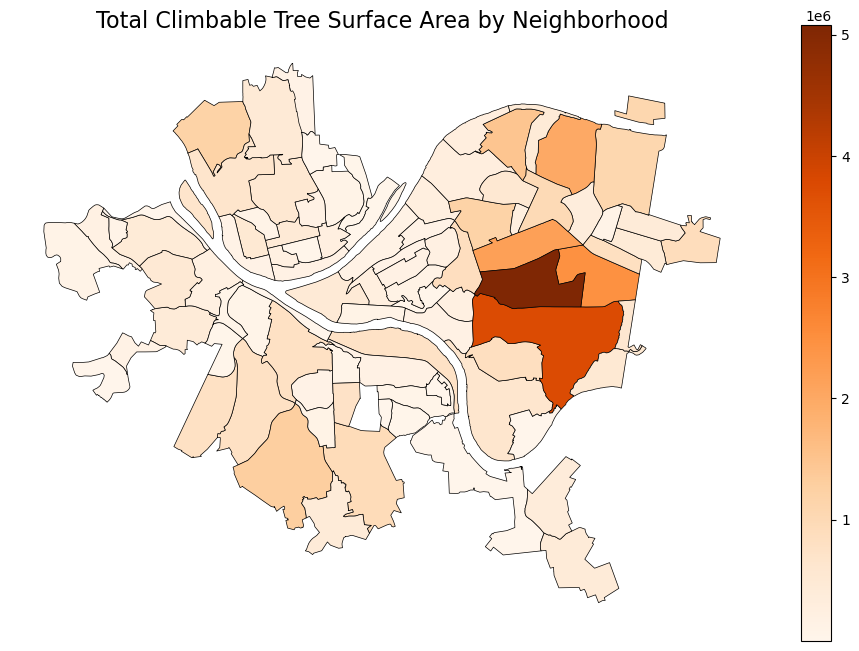

In [10]:
# Merge climbable surface area into shapefile
neighborhoods_with_surface = neighborhoods.merge(neighborhood_surface_area, left_on='hood',
                                                 right_on='neighborhood',how='left')

# Make sure the neighborhoods match
neighborhoods_with_surface['surface_area'] = neighborhoods_with_surface['surface_area'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))

neighborhoods_with_surface.plot(
    column='surface_area',
    cmap='Oranges',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

ax.set_title("Total Climbable Tree Surface Area by Neighborhood", fontsize=16)
ax.axis('off')

plt.show()

In [11]:
# Show data in a table
print("🌳 Top 5 Neighborhoods by Climbable Tree Surface Area")
neighborhood_surface_area.head(5)

🌳 Top 5 Neighborhoods by Climbable Tree Surface Area


,neighborhood,surface_area
75,Squirrel Hill North,5.079424e+06
76,Squirrel Hill South,3.737012e+06
62,Point Breeze,2.471529e+06
67,Shadyside,2.166895e+06
39,Highland Park,1.995873e+06


## According to our refined data...

**Squirrel Hill North**

Has the most climbable area!

Well, let's not forget about the weird trees yet...

# Weird Trees 🥸

For these, we can simply count how many of these are in each neighborhood

In [12]:
# Count the weird trees by neighborhood
weird_tree_counts = (weird_trees.groupby('neighborhood').size()
                     .reset_index(name='weird_tree_count')
                     .sort_values(by='weird_tree_count', ascending=False))

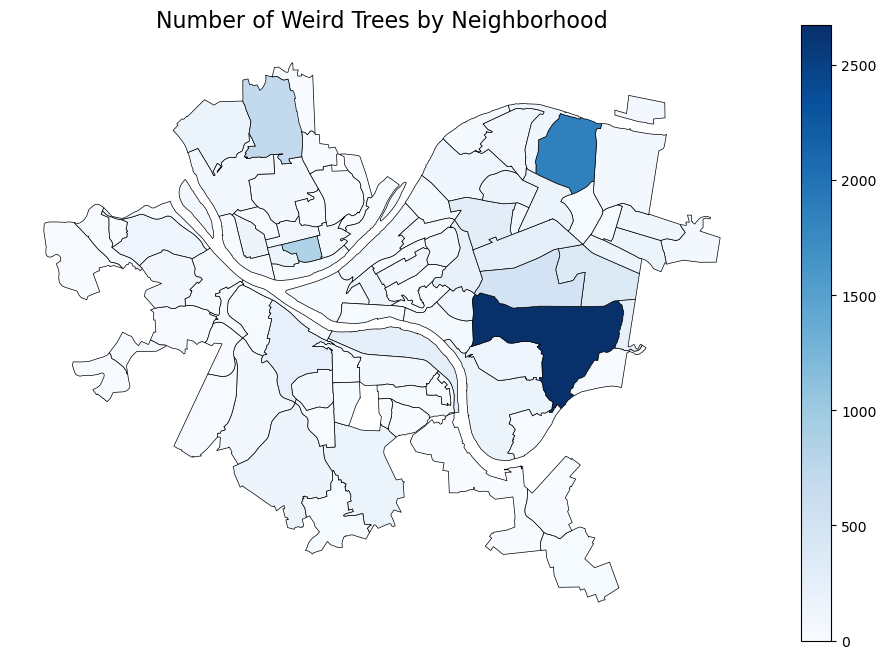

In [13]:
# Merge with the shapefile
neighborhoods_with_weird_count = neighborhoods.merge(weird_tree_counts,left_on='hood',
    right_on='neighborhood',
    how='left')

# Fill missing counts with 0
neighborhoods_with_weird_count['weird_tree_count'] = neighborhoods_with_weird_count['weird_tree_count'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))

neighborhoods_with_weird_count.plot(
    column='weird_tree_count',
    cmap='Blues',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

ax.set_title("Number of Weird Trees by Neighborhood", fontsize=16)
ax.axis('off')

plt.show()

In [14]:
# Show the table
print("🥸 Top 5 Neighborhoods by Number of Wierd Trees")
weird_tree_counts.head(5)

🥸 Top 5 Neighborhoods by Number of Wierd Trees


,neighborhood,weird_tree_count
72,Squirrel Hill South,2678
37,Highland Park,1861
0,Allegheny Center,848
56,Perry North,692
71,Squirrel Hill North,497


## What a coincidence...

Squirrel Hill South

Has the most **total trees**

*and*

the most **"weird" trees.**

So, if we were going by *best out of 3* categories...

### Squirrel Hill South would be number 1!

But, we must be a little more nuanced...

![thinking](https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExM2d0aHQxbGdpdWp0czVnbmtscTBzczczOHhzb3JheW45ZzdwdjhjZiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/WRQBXSCnEFJIuxktnw/giphy.gif)

# The Final Verdict ⚖

We have explored total tree counts, total tree surface area, and even the realm of weird trees...

Squirell Hill South has the most total trees, along with the most "weird" trees with missing data.

#### However...

Our definitive measure of feline friendliness is total climbable surface area - *and the winner is:*

##### 🐱🎉 **Squirell Hill North** 🎉🐱

This neighborhood offers the most total tree area for adventurous stray cats to climb, perch, and nap!

![cool cat](https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExaWpiZ25uZGFmNjMyajM4MGhia2VzMDZmeHl5aWxpcHpyZWFlenhwYSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/bRTe2TGxczPVH50vxO/giphy.gif)

![another cat](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExYzlmbXMxbG42MWNoeDI1cW9jYmhvd2Njb3pxZ2VybDA5azFsdnYwdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/S9zTGfCeqg9ROgiof7/giphy.gif)

In [15]:
# Get top 10 surface area neighborhoods
top10_rank = neighborhood_surface_area.head(10).copy()

#Create a column for rank
top10_rank['rank'] = range(1, 11)

# Define a method for calculating score
def get_score(rank):
    return 110 - rank * 10

# Assign each neighborhood a score
top10_rank['score'] = top10_rank['rank'].apply(get_score)

# Show the table
top10_rank.head(10)

,neighborhood,surface_area,rank,score
75,Squirrel Hill North,5.079424e+06,1,100
76,Squirrel Hill South,3.737012e+06,2,90
62,Point Breeze,2.471529e+06,3,80
67,Shadyside,2.166895e+06,4,70
39,Highland Park,1.995873e+06,5,60
78,Stanton Heights,1.484717e+06,6,50
13,Brookline,1.307726e+06,7,40
9,Bloomfield,1.199787e+06,8,30
12,Brighton Heights,1.196796e+06,9,20
46,Lincoln-Lemington-Belmar,1.089793e+06,10,10


## Analysis of 'Smart' Trashcan Locations ≽^•⩊•^≼

by Leo Morse

link to dataset: https://data.wprdc.org/datastore/dump/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9

This dataset is managed by the City of Pittsburgh, and includes the location of every city-managed trashcan (called 'Smart Trash Containers').

The idea is that overflowing trash cans will provide an easily accessible food source for stray cats; people throw away a crazy amount of food! Even better, though, trash is known to attract mice and rats, which the stray cats would likely prefer over scraps. (Diagram included below)


   # ᓚᘏᗢ 

              ᘛ⁐̤ᕐᐷ 🗑️

To get started, let's import all the cool stuff we're using...

In [52]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Let's take a look at our data set as-is!

In [53]:
data = pd.read_csv("trashdata.csv", index_col="container_id")
data.head()

,_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
container_id,,,,,,,,,,,,,,,,
1,342805,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
2,342806,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
3,342807,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
4,342808,74,2017-09-14T13:24:40,2022-10-24T12:40:24,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
5,342809,74,2017-09-19T12:22:45,2022-12-31T01:58:16,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444


Ok, there's a lot of unneccessary information here. Let's do some tweaking...

(Made the neighborhood the index, added up the number of trashcans per neighborhood, sorted by amount, removed all data except for the number of trash cans per each unique neighborhood)

<Axes: xlabel='neighborhood'>

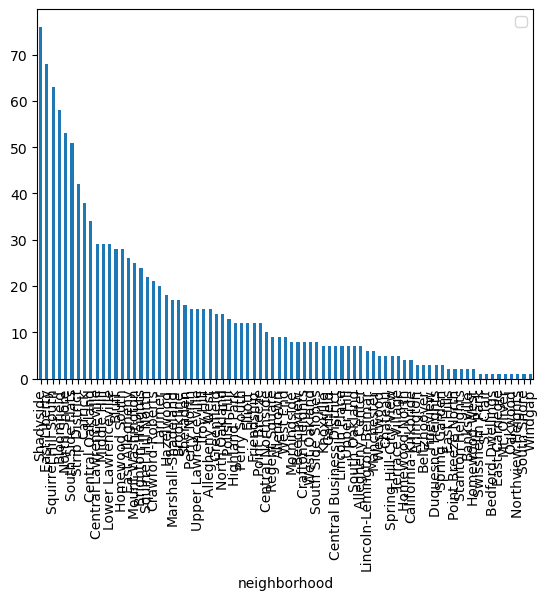

In [54]:
num_cans = data.groupby("neighborhood").count().sort_values(by='_id', ascending=False)
num_cans = num_cans[['_id']]
num_cans.plot.bar()

Woah, that's a lot of neighborhoods! Let's take a look at the top 25.

<Axes: xlabel='neighborhood'>

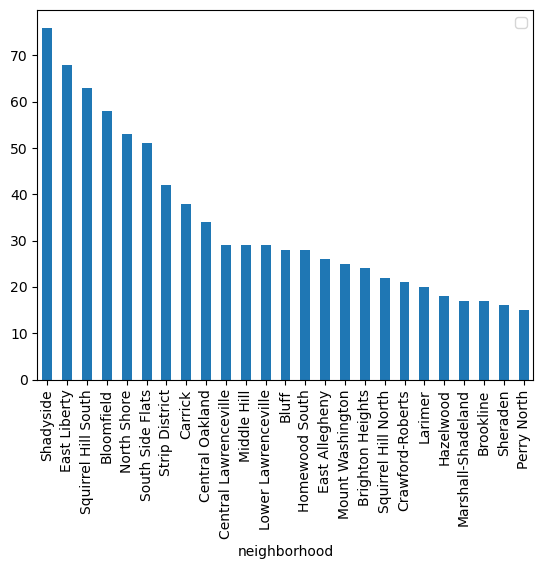

In [55]:
num_cans.head(25).plot.bar()

Cool! Looks like the neighborhoods East of Oakland and on the North Shore may be ideal based on this metric.

Now that we have our data in the correct format, let's create a map using Geopandas for easier visualization.

I've included some formatting details to make it more ✨aesthetically pleasing.✨

<Axes: >

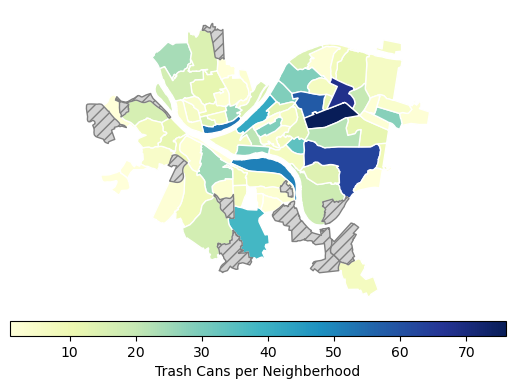

In [56]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
trash_map = neighborhoods.merge(num_cans, how='left', left_on='hood', right_on='neighborhood')
trash_map = trash_map[['hood','_id','geometry']]
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
ax.set_axis_off()
trash_map.plot(column='_id',
              legend=True,
              legend_kwds={'label': "Trash Cans per Neighberhood", 'orientation': 'horizontal'},
              figsize=(15, 10),
              edgecolor="white",
               cmap='YlGnBu',
               missing_kwds={
                   "color": "lightgrey",
                   "edgecolor": "grey",
                   "hatch": "///",
                   "label": "Missing values"},
               ax=ax,
               cax=cax
              )

(The grey areas are neighborhoods for which there was no data in this data set)

There you have it! Shadyside is the best neighborhood for a stray cat based on this data.

Now let's assign each of the top 10 neighborhoods with a score from 100-10 to make the final comparison easier.

In [57]:
num_cans.head(10)
# Get top 10 surface area neighborhoods
top10_ranked = num_cans.head(10).copy()
 
#Create a column for rank
top10_ranked['rank'] = range(1, 11)
 
# Define a method for calculating score
def get_score(rank):
    return 110 - rank * 10
 
# Assign each neighborhood a score
top10_ranked['score'] = top10_ranked['rank'].apply(get_score)
 
# Show the table
top10_ranked.head(10)

,_id,rank,score
neighborhood,,,
Shadyside,76,1,100
East Liberty,68,2,90
Squirrel Hill South,63,3,80
Bloomfield,58,4,70
North Shore,53,5,60
South Side Flats,51,6,50
Strip District,42,7,40
Carrick,38,8,30
Central Oakland,34,9,20


According to the amount of trashcans per neighborhood, Shadyside is ideal for a stray cat! Personally I would've expected it to be Swissvale; on my journey to TacoBell one night I saw a rat the size of a football, but the Swissvale area is actually one of the lowest for this metric! Maybe that rat was somebody's pet though; I didn't check for a collar.

![sleeping rat in pajamas](https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExd2FjOWhkZzE3d2RjeWhyamUxNzVkc2p1MDkzajZ4cHI2cXVrem1jbyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/ZP0dwcxmqr9Dy/giphy.gif)
![cat peeking out of trashcan](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExaDBybGI2NWs5cDRiMDR0MWFuaDViaHM2bHE5d2doYmExZTV2aGo0cyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/3oKIPes0R5Kgypfk7C/giphy.gif)


# Analysis of air pollution
by Alex Sun

link to data https://data.wprdc.org/dataset/toxic-release-inventory/resource/2750b8c8-246b-430f-b1e0-1aa96e00b013

This data comes from Allegheny county and measures air pollution.

Air pollution is bad for one's health. Simple as.

The following cell will take a while to run (~2 min); please be patient!

In [22]:
import fpsnippets
import pandas as pd

airPollutionCSV = pd.read_csv("airPollution.csv", index_col="_id")

query_mask = airPollutionCSV['CITY_NAME'] == "PITTSBURGH"

airPollutionPGH = airPollutionCSV[query_mask]

neighborhoodPollution = {}

for index, row in airPollutionPGH.iterrows():
    if isinstance(fpsnippets.zip_to_neighborhoods(row['ZIP_CODE']), list):
        if len(fpsnippets.zip_to_neighborhoods(row['ZIP_CODE'])) != 0:
            if not pd.isna(row['TOTAL_RELEASE']):
                adj_amount = row['TOTAL_RELEASE'] / len(fpsnippets.zip_to_neighborhoods(row['ZIP_CODE']))
            elif not pd.isna(row['REL_EST_AMT']):
                adj_amount = row['REL_EST_AMT'] / len(fpsnippets.zip_to_neighborhoods(row['ZIP_CODE']))
            else:
                adj_amount = 0

            for neighborhood in fpsnippets.zip_to_neighborhoods(row['ZIP_CODE']):
                if neighborhood in neighborhoodPollution:
                    neighborhoodPollution[neighborhood] += adj_amount
                else:
                    neighborhoodPollution[neighborhood] = adj_amount

nghpolSeries = pd.Series(neighborhoodPollution)
nghpolSorted = nghpolSeries.sort_values(ascending=True)
print(nghpolSorted.head(10))

# The total amount (in pounds) of the toxic chemical released to air during the calendar year (January 1 - December 31). 
# Release amounts may be reported as specific numbers or as ranges (RELEASE_RANGE_CODE).

West Oakland                  45.736667
Terrace Village               45.736667
Upper Hill                    45.736667
Crawford-Roberts              45.736667
Central Business District     45.736667
Bluff                         45.736667
North Oakland                 45.736667
Middle Hill                   45.736667
Bedford Dwellings             45.736667
Arlington Heights            372.614814
dtype: float64


# oh yeah
The data comes sorted by zip code, which isn't exactly what we're looking for...

To get a rough idea of pollution by neighborhood, we assume that every instance of pollution in a zip code is evenly distributed between the neighborhoods in that zip code.

The data themselves are measurements of lbs of air pollution released per year.

Let's take a look at the results.

<Axes: >

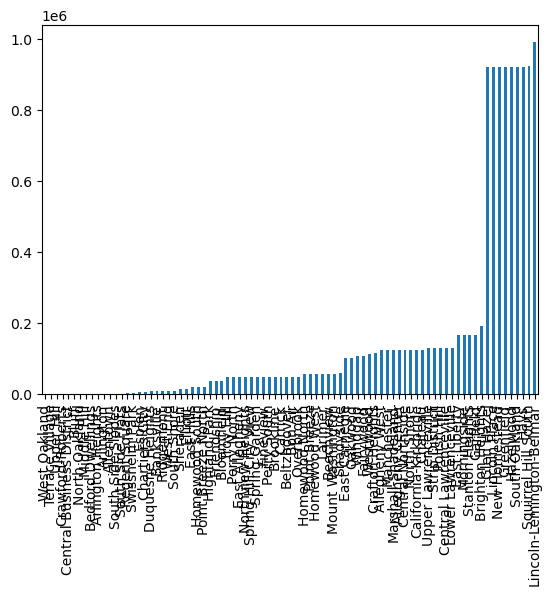

In [23]:
nghpolSorted.plot.bar()

# oh yikes
Looks like there are some ties...thanks to the zip codes each containing multiple neighborhoods. Well, without finer resolution data, this is the best we can do. Let's give them scores based on their pollution levels.

In [24]:
neighborhoodScore = {}
for key, value in nghpolSeries.items():
    neighborhoodScore[key] = (100 * (1 - (value / nghpolSorted.max())))
nghscoSeries = pd.Series(neighborhoodScore)
nghscoSorted = nghscoSeries.sort_values(ascending=False)
print(nghscoSorted.head(10))
len(nghscoSorted)

Crawford-Roberts             99.995380
North Oakland                99.995380
Bluff                        99.995380
Middle Hill                  99.995380
Terrace Village              99.995380
West Oakland                 99.995380
Upper Hill                   99.995380
Bedford Dwellings            99.995380
Central Business District    99.995380
Arlington                    99.962362
dtype: float64


84

# nice
Now they have scores from 0 to almost 100 that are based linearly upon their pollution level. Fantastic! We can now pronounce the winner: zip code 15219, encompassing most of the Hill District and inexplicably also Station Square. But it's a little strange that there are only 84 neighborhoods listed here when Pittsburgh has 90 neighborhoods...let's try to find the six neighborhoods so free of air pollution that they aren't present in the pollution data.

In [25]:
neighborhoodCSV = pd.read_csv("pgh_neighborhoods.csv", index_col="_id")

neighborhoods = []

cleanhoods = []

for index, row in neighborhoodCSV.iterrows():
    neighborhoods.append(row['hood'])

for neighborhood in neighborhoods:
    if neighborhood not in nghscoSorted.index:
        cleanhoods.append(neighborhood)

print(cleanhoods)

['Squirrel Hill North', 'Knoxville', 'Central Oakland', 'Mt. Oliver', 'St. Clair', 'Summer Hill']


# fresh air
And there they are. The six neighborhoods with the cleanest air. We can assign them scores of 100, as they have no pollution listed in the pollution dataset.

In [41]:
cleanscores = [100, 100, 100, 100, 100, 100]

cleanscoSeries = pd.Series(cleanscores, index=cleanhoods)

pghpolSco = pd.concat([cleanscoSeries, nghscoSorted])

print(pghpolSco)

Squirrel Hill North         100.000000
Knoxville                   100.000000
Central Oakland             100.000000
Mt. Oliver                  100.000000
St. Clair                   100.000000
                               ...    
Hazelwood                     7.066587
South Oakland                 7.061967
Hays                          7.029516
Squirrel Hill South           6.839303
Lincoln-Lemington-Belmar      0.000000
Length: 90, dtype: float64


# plot again
Let's plot it again.

<Axes: >

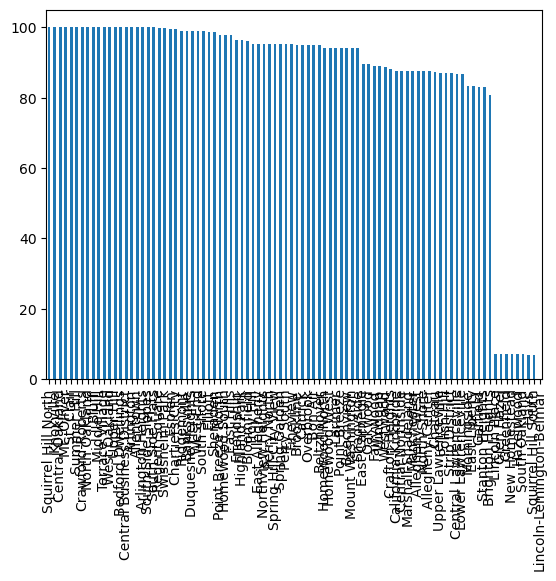

In [27]:
pghpolSco.plot.bar()

# end
Funny how Squirrel Hill and Oakland contain both ends of the spectrum within them...this is as far as I will go with my analysis, however. The six cleanest neighborhoods are above, and the rest are pretty close, with the exception of a few extremely dirty neighborhoods.

In [50]:
# Convert the Series to a DataFrame and move the index into a column
pghpolSco_rev = pghpolSco.to_frame().reset_index()

# Rename the columns
pghpolSco_rev.columns = ['neighborhood', 'score']

pghpolSco_rev = pghpolSco_rev.sort_values(by='score', ascending=False).reset_index(drop=True)

# Keep only one score per group
unique_scores = pghpolSco_rev['score'].drop_duplicates().sort_values(ascending=False).reset_index(drop=True)

# Create a dictionary for mapping unique scores
new_scores = {score: 100 - i * 10 for i, score in enumerate(unique_scores)}

# Map unique scores
pghpolSco_rev['adjusted_score'] = pghpolSco_rev['score'].map(new_scores)

pghpolSco_rev = pghpolSco_rev[['neighborhood', 'adjusted_score']]

pghpolSco_rev.head(25)

,neighborhood,adjusted_score
0,Knoxville,100
1,Squirrel Hill North,100
2,Summer Hill,100
3,St. Clair,100
4,Central Oakland,100
5,Mt. Oliver,100
6,Terrace Village,90
7,West Oakland,90
8,Crawford-Roberts,90
9,North Oakland,90


# Final Conclusion

Combining all of our analysis...

Now, we must figure out which neighborhood is definitively the best for a stray cat

To do this, we will combine the scores from each final table!

In [58]:
# Reset index on top10_ranked to get 'neighborhood' out of the index
top10_ranked = top10_ranked.reset_index()

# Create copies, with only necessary columns
tree_score_df = top10_rank[['neighborhood', 'score']].copy()
trash_score_df = top10_ranked[['neighborhood', 'score']].copy()

# Rename columns to ensure continuity before the merge
tree_score_df = tree_score_df.rename(columns={'score': 'tree_score'})
trash_score_df = trash_score_df.rename(columns={'score': 'trash_score'})
pghpolSco_rev = pghpolSco_rev.rename(columns={'adjusted_score' : 'air_score'})

# Error debugging, reset index to make sure that neighborhood is a regular column
tree_score_df = tree_score_df.reset_index(drop=True)
trash_score_df = trash_score_df.reset_index(drop=True)
pghpolSco_rev = pghpolSco_rev.reset_index(drop=True)

# More error debugging >:( making sure neighborhood column is string type
tree_score_df['neighborhood'] = tree_score_df['neighborhood'].astype(str)
trash_score_df['neighborhood'] = trash_score_df['neighborhood'].astype(str)
pghpolSco_rev['neighborhood'] = pghpolSco_rev['neighborhood'].astype(str)

# Merge the data frames into a single, new one
final_scores = tree_score_df.merge(trash_score_df, on='neighborhood', how='outer')
final_scores = final_scores.merge(pghpolSco_rev, on='neighborhood', how='outer')

# Making sure missing data is filled with 0, and all values are float type
final_scores[['tree_score', 'trash_score', 'air_score']] = (
    final_scores[['tree_score', 'trash_score', 'air_score']]
    .fillna(0)
    .astype(float)
)

# Adding up the scores
final_scores['total_score'] = (
    final_scores['tree_score'] +
    final_scores['trash_score'] +
    final_scores['air_score']
)

# Sort the data by total score, ensure that index is reset, assign a final rank
final_scores = final_scores.sort_values(by='total_score', ascending=False).reset_index(drop=True)
final_scores['final_rank'] = final_scores.index + 1

final_scores.head(10)

,neighborhood,tree_score,trash_score,air_score,total_score,final_rank
0,Squirrel Hill North,100.0,0.0,100.0,200.0,1
1,South Side Flats,0.0,50.0,70.0,120.0,2
2,Central Oakland,0.0,20.0,100.0,120.0,3
3,Knoxville,0.0,0.0,100.0,100.0,4
4,Summer Hill,0.0,0.0,100.0,100.0,5
5,St. Clair,0.0,0.0,100.0,100.0,6
6,Mt. Oliver,0.0,0.0,100.0,100.0,7
7,Shadyside,70.0,100.0,-80.0,90.0,8
8,Crawford-Roberts,0.0,0.0,90.0,90.0,9
9,North Oakland,0.0,0.0,90.0,90.0,10


# There we have it!

The definitive **best** neighborhood to be a stray cat is...

### 🐱 **Squirrel Hill North!** 🐱

![cat party](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExYjZiZW9wYml0NWd4dGVodml6djVsZHA3ZHZnanJsMGw2Y2Nzb2QyYyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/7oZ21DQBDoZ2/giphy.gif)